# Financial Econometrics I: Homework 2
Jan Kubal & Matyáš Mattanelli

### Problem 1

In [2]:
#Loading necessary packages
suppressPackageStartupMessages({
library(quantmod)
})

In [3]:
#Loading the file containing the symbols
symbols2 <- read.csv("symbols2.csv")

#Generating 100 random numbers
set.seed(48983854) #random seed using the SIS number
indices <- sort(sample(1:377, 100, replace = F))

#Extracting the tickers
tickers <- symbols2$Symbol[indices]

#Downloading the data for each ticker
tickers_data <- vector("list", length(tickers)) #Empty list for the data
options("getSymbols.warning4.0" = FALSE) #To suppress an annoying message
for (i in 1:length(tickers)) {
    tickers_data[[i]] <- getSymbols(tickers[i], src = "yahoo", auto.assign = F, from = "2019-01-01", to = "2022-01-01")
}

Warning message:
"BMS contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them."


In [4]:
#check that closing price is in the fourth column
fourth_cols <- vector("character", length(tickers_data))
is_close <- vector("character", length(tickers_data))

for(i in 1:length(tickers_data)) {
 fourth_cols[i] <- names(tickers_data[[i]])[4]
}

for(i in 1:length(tickers_data)) {
 is_close[i] <- substr(fourth_cols[i],  nchar(fourth_cols[i])-4, nchar(fourth_cols[i])) #selecting only last five characters of each column name
}

sum(is_close == "Close") #If we get here sum of 100, we got all the closing prices in the fourth column and can continue to subsetting

[1] 100

In [5]:
#Creating list containing Log-returns
log_returns <- vector("list", length(tickers_data))

for(i in 1:length(tickers_data)) {
    obs <- length(tickers_data[[i]][,4])
    lrets <- vector("numeric", obs)
    lrets[1] <- NA

    for(n in 2:obs){
        lrets[n] <- as.numeric(log(tickers_data[[i]][n,4])) - as.numeric(log(tickers_data[[i]][n-1,4]))
    }

    log_returns[[i]] <- data.frame(Date = index(tickers_data[[7]]), tickers_data[[i]][,4], Log_returns = lrets)
}

#Each element of the list log_returns is a dataframe, containing dates, original closing prices and logarithmic returns
#(the original prices is included mainly so the firm it belongs to could be easily recognized by ticker)

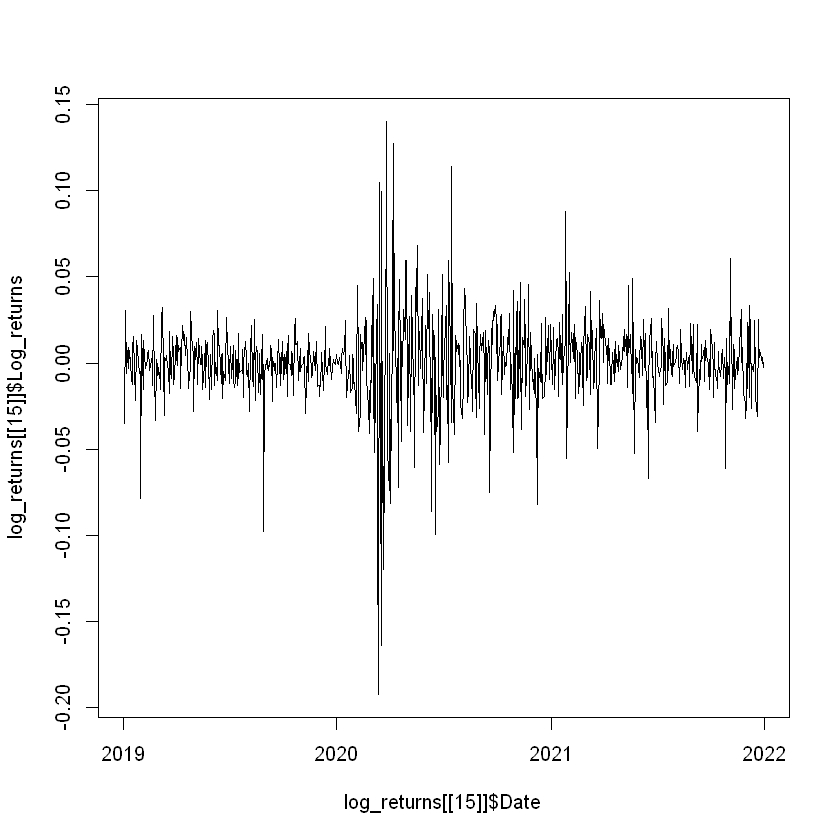

In [9]:
plot(x=log_returns[[15]]$Date, y=log_returns[[15]]$Log_returns, type="l")